In [126]:
import numpy as np
import matplotlib.pyplot as plt

# Метрики

In [411]:
def metric_q2(x):#передается np.abs(x)
    n=len(x)
    k=0.7
    s=np.zeros(n)
    x_abs=np.abs(x)
    for i in range(n):
        if(x_abs[i]<=k):
            s[i]=(x_abs[i]**2)/2
        else:
            s[i]=k*np.abs(x_abs[i])-(k**2)/2
    return np.diag(s), np.sum(s)

In [412]:
def metric_q(x):
    n=len(x)
    k=0.7
    x_abs=np.abs(x)
    s=np.zeros(n)
    mask=np.zeros(n)
    mask[x_abs<k]=1
    s[mask==1]=(x_abs[mask==1]**2)/2
    s[mask==0]=k*x_abs[mask==0]-(k**2)/2
    return s, np.sum(s)

In [413]:
def quadratic_metric(x):
    return x**2, np.sum(x**2)

# Модель 

In [414]:
def Coef(x,y,m, metric, epc=0.01):
    n=len(x)
    
    Phi=np.array([x**k for k in range(0,m+1)]).T  
    G=Phi.T@Phi
    z=Phi.T@y
    
    theta=np.linalg.solve(G, z)
    #print(theta)
    def calculate(metric,Phi,theta,y):
        
        def no_zero(x):
            mask=np.zeros(len(x))
            mask[np.abs(x)<epc]=1
            x[mask==1]=epc
            return x
        
        #A=no_zero(metric(Phi@theta-y)[0])
        A=metric(Phi@theta-y)[0]
        B=no_zero(quadratic_metric(Phi@theta-y)[0])
        #print('diagonal element matrix A/B')
        #print(A/B)
        return np.diag((A/B))
        
    
    err=metric(Phi@theta-y)[1]
    
    
    it=0
    while(err>epc):
        B=calculate(metric,Phi,theta,y)
        #print(B)
        G_B=Phi.T@B@Phi
        z_B=Phi.T@B@y
        theta_new=np.linalg.solve(G_B, z_B)
        err=metric(Phi@theta-y)[1]
        it+=1
        #print('--------')
        #print(it,err,theta, theta_new)
        l=quadratic_metric(theta_new-theta)[1]
        print('theta_new-theta=',l)
        if(l<1e-20):
            break
        theta=theta_new
        if(it>500):break
     
    print('train error=', err)
    print('interation=',it)
    return theta

# Тестирование 

In [415]:
def Model(k=11,N=101,m=2,a=-2*np.pi,b=2*np.pi,fun=np.sin, noise=0.05):
    X_train=np.linspace(a, b,k)
    X=np.linspace(a, b,N)
    Y_train=fun(X_train)
    Y_train[5]=8
    Y_train[-3]=-5
    print('----------------------')
    print("Модель с заданой метрикой")
    Coef_metric=Coef(X_train,Y_train,m,metric_q,1e-10)
    print("Коэффициенты заданной метрики", Coef_metric)
    print('----------------------')
    print("Модель с обычной метрикой")
    Coef_quad=Coef(X_train,Y_train,m,quadratic_metric,1e-10)
    print("Коэффициенты обычной метрики", Coef_quad)
    print('----------------------')
    #print(Coef_metric)

    def model_fun(t):
        s=0
        for i in range(0,m+1):
            s+=Coef_quad[i]*(t**i)
        return  s  #np.sum(np.array([Coef[k]*(t**k) for k in range(0,m+1)]))
    
    def model_fun_m(t):
        s=0
        for i in range(0,m+1):
            s+=Coef_metric[i]*(t**i)
            #print(Coef_metric[i]*(t**i))
        return  s

    
    plt.plot(X,fun(X),'darkgreen',label="истинное значение")
    plt.plot(X_train,Y_train,'bv',label="эмпирические данные")
    plt.plot(X_train,model_fun_m(X_train),'yo',label="обученная модель с определенной метрикой" )
    plt.plot(X_train,model_fun(X_train),'r*',label="обученная модель с обычной метрикой" )
    plt.legend(bbox_to_anchor=(1.1, 1))
    plt.show()

----------------------
Модель с заданой метрикой
theta_new-theta= 0.06841449082162178
theta_new-theta= 0.008529643917885655
theta_new-theta= 0.0007271609637019913
theta_new-theta= 4.839539634576689e-05
theta_new-theta= 3.022624365748917e-06
theta_new-theta= 1.86301991123667e-07
theta_new-theta= 1.1422218683204114e-08
theta_new-theta= 6.988543949218515e-10
theta_new-theta= 4.2727191680827454e-11
theta_new-theta= 2.6116386080242824e-12
theta_new-theta= 1.5961918965673647e-13
theta_new-theta= 9.75539412875896e-15
theta_new-theta= 5.962116142497582e-16
theta_new-theta= 3.643801034338517e-17
theta_new-theta= 2.2269395342970745e-18
theta_new-theta= 1.361012161411889e-19
theta_new-theta= 8.317942699577171e-21
train error= 12.074246249454008
interation= 17
Коэффициенты заданной метрики [ 0.15102898 -0.09945315 -0.00619262]
----------------------
Модель с обычной метрикой
theta_new-theta= 5.628530262471697e-32
train error= 81.67387817919942
interation= 1
Коэффициенты обычной метрики [ 0.5215951

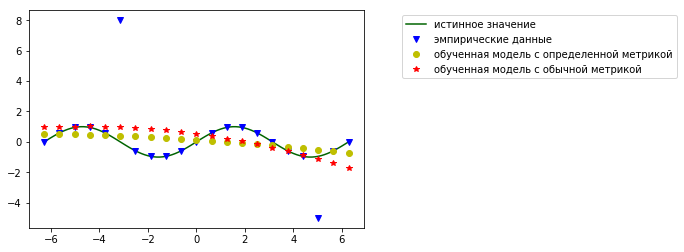

In [416]:
Model(k=21)

----------------------
Модель с заданой метрикой
theta_new-theta= 0.11891173672068617
theta_new-theta= 0.012465830500051402
theta_new-theta= 0.0012791115954126626
theta_new-theta= 0.0001088400399245056
theta_new-theta= 8.494592685721379e-06
theta_new-theta= 6.433304278823343e-07
theta_new-theta= 4.825072105838185e-08
theta_new-theta= 3.6079051373356215e-09
theta_new-theta= 2.695371379473451e-10
theta_new-theta= 2.0131919989175633e-11
theta_new-theta= 1.50362625853377e-12
theta_new-theta= 1.1230607754156305e-13
theta_new-theta= 8.388360367116803e-15
theta_new-theta= 6.26554473737912e-16
theta_new-theta= 4.6799995630401335e-17
theta_new-theta= 3.495715005497494e-18
theta_new-theta= 2.611125973843355e-19
theta_new-theta= 1.9503902258810122e-20
theta_new-theta= 1.45684113686785e-21
train error= 12.069854721567884
interation= 19
Коэффициенты заданной метрики [ 0.14336333 -0.0777834  -0.00600718 -0.00079553]
----------------------
Модель с обычной метрикой
theta_new-theta= 0.0
train error= 7

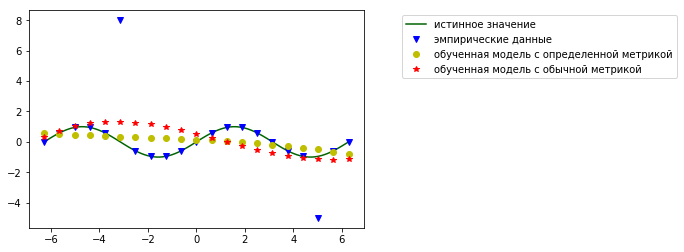

In [417]:
Model(m=3,k=21)

----------------------
Модель с заданой метрикой
theta_new-theta= 0.08621871221009257
theta_new-theta= 0.010778171794310554
theta_new-theta= 0.001339754795219535
theta_new-theta= 0.00012683064860435708
theta_new-theta= 1.0561591901354765e-05
theta_new-theta= 8.417262446861011e-07
theta_new-theta= 6.620065855957481e-08
theta_new-theta= 5.189351227938823e-09
theta_new-theta= 4.0668622481000515e-10
theta_new-theta= 3.189087722791103e-11
theta_new-theta= 2.502557236992599e-12
theta_new-theta= 1.9650291859492963e-13
theta_new-theta= 1.543691788759099e-14
theta_new-theta= 1.2131207482810985e-15
theta_new-theta= 9.535779273057855e-17
theta_new-theta= 7.496956830875738e-18
theta_new-theta= 5.894774926540652e-19
theta_new-theta= 4.6354211002945056e-20
theta_new-theta= 3.6452909191770004e-21
train error= 12.063728004618962
interation= 19
Коэффициенты заданной метрики [ 0.11898018 -0.07763631 -0.00053287 -0.00079996 -0.00014591]
----------------------
Модель с обычной метрикой
theta_new-theta= 9.

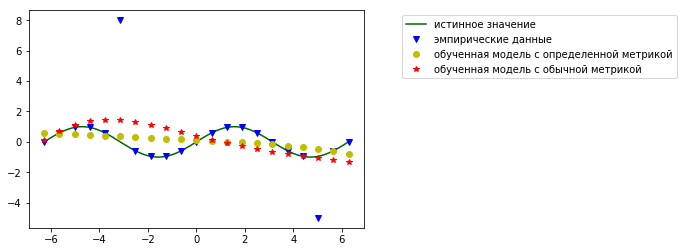

In [418]:
Model(m=4,k=21)

----------------------
Модель с заданой метрикой
theta_new-theta= 0.16124164466556828
theta_new-theta= 0.001351944159687358
theta_new-theta= 4.786053703497583e-06
theta_new-theta= 2.4844574502390587e-07
theta_new-theta= 1.1421913302319469e-08
theta_new-theta= 4.976597830035477e-10
theta_new-theta= 2.1463303728695106e-11
theta_new-theta= 9.23966319156138e-13
theta_new-theta= 3.976214250177061e-14
theta_new-theta= 1.7110247209954571e-15
theta_new-theta= 7.362773851170195e-17
theta_new-theta= 3.1682282161483302e-18
theta_new-theta= 1.3633622021327796e-19
theta_new-theta= 5.862962960367126e-21
train error= 8.4678663068498
interation= 14
Коэффициенты заданной метрики [ 1.31717216e-01  6.07720730e-01 -2.04856903e-02 -7.50342505e-02
  3.39234867e-04  1.53738111e-03]
----------------------
Модель с обычной метрикой
theta_new-theta= 2.940326560713229e-29
train error= 69.48949868722836
interation= 1
Коэффициенты обычной метрики [ 0.39874819  0.26487253  0.00555865 -0.06560355 -0.00077406  0.0015

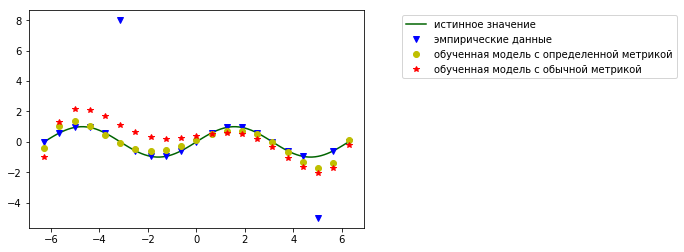

In [419]:
Model(m=5,k=21)

----------------------
Модель с заданой метрикой
theta_new-theta= 0.10183749461887862
theta_new-theta= 0.00804312686586156
theta_new-theta= 0.00031969750842324147
theta_new-theta= 2.274245330788947e-05
theta_new-theta= 1.819530624012119e-06
theta_new-theta= 1.33935733443575e-07
theta_new-theta= 1.0087250442654579e-08
theta_new-theta= 7.729668985182946e-10
theta_new-theta= 5.957735183666055e-11
theta_new-theta= 4.599153232995653e-12
theta_new-theta= 3.55173221537352e-13
theta_new-theta= 2.743096922423534e-14
theta_new-theta= 2.1186095427308996e-15
theta_new-theta= 1.6362822324678544e-16
theta_new-theta= 1.2639084324335558e-17
theta_new-theta= 9.759867786726237e-19
theta_new-theta= 7.542261084876991e-20
theta_new-theta= 5.822473522356809e-21
train error= 7.875382219138909
interation= 18
Коэффициенты заданной метрики [-1.25355893e-01  9.07761269e-01  1.21189819e-01 -1.45281712e-01
 -9.62815616e-03  5.26480262e-03  1.70305538e-04 -5.48128848e-05]
----------------------
Модель с обычной мет

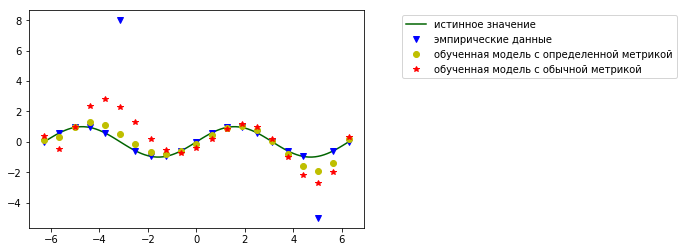

In [420]:
Model(m=7,k=21)

----------------------
Модель с заданой метрикой
theta_new-theta= 0.24856789382465153
theta_new-theta= 0.019095859485896927
theta_new-theta= 0.0008924556915033363
theta_new-theta= 3.4444752138589364e-05
theta_new-theta= 1.6186267443403028e-06
theta_new-theta= 8.216475575737385e-08
theta_new-theta= 4.415204297668933e-09
theta_new-theta= 2.425408043085035e-10
theta_new-theta= 1.3419251533324048e-11
theta_new-theta= 7.440840874452047e-13
theta_new-theta= 4.128563051071765e-14
theta_new-theta= 2.2912756819023306e-15
theta_new-theta= 1.2716576176631043e-16
theta_new-theta= 7.055323875289502e-18
theta_new-theta= 3.9176420761520088e-19
theta_new-theta= 2.194383169369578e-20
theta_new-theta= 1.127946345668392e-21
train error= 7.870373201886973
interation= 17
Коэффициенты заданной метрики [-2.12770102e-01  9.08160657e-01  1.98014829e-01 -1.45770768e-01
 -1.97201724e-02  5.28983387e-03  5.87707188e-04 -5.51377998e-05
 -5.33000115e-06]
----------------------
Модель с обычной метрикой
theta_new-th

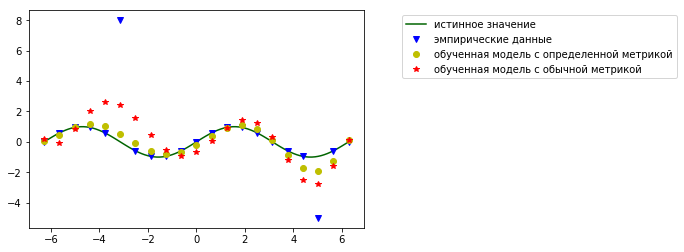

In [421]:
Model(m=8,k=21)

----------------------
Модель с заданой метрикой
theta_new-theta= 0.35988755991481064
theta_new-theta= 0.02468244253561085
theta_new-theta= 0.001756178206791585
theta_new-theta= 1.7790438394223383e-05
theta_new-theta= 6.152826908036814e-07
theta_new-theta= 3.4866256833704684e-08
theta_new-theta= 2.0999859388787492e-09
theta_new-theta= 1.2214935984807513e-10
theta_new-theta= 6.9413928893461555e-12
theta_new-theta= 3.9049180940283714e-13
theta_new-theta= 2.1880550662256725e-14
theta_new-theta= 1.2237832286958192e-15
theta_new-theta= 6.851772851894833e-17
theta_new-theta= 3.810003057399096e-18
theta_new-theta= 2.0787553634739954e-19
theta_new-theta= 1.3543449523655818e-20
theta_new-theta= 7.487603485236426e-22
train error= 7.861019632237952
interation= 17
Коэффициенты заданной метрики [-2.14737912e-01  9.82885771e-01  1.99879541e-01 -1.74059381e-01
 -1.97750609e-02  7.99829539e-03  5.88362662e-04 -1.48673390e-04
 -5.34164894e-06  1.06145743e-06]
----------------------
Модель с обычной мет

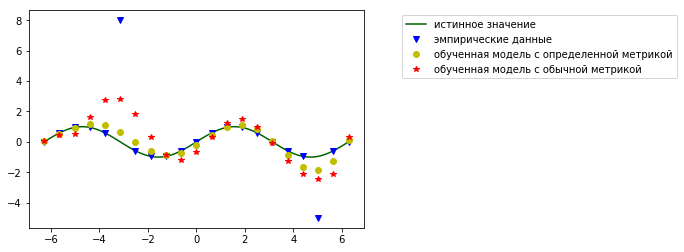

In [422]:
Model(m=9,k=21)

----------------------
Модель с заданой метрикой
theta_new-theta= 0.10058028915201106
theta_new-theta= 0.01750884739721963
theta_new-theta= 0.006809862435361687
theta_new-theta= 0.00199955849175452
theta_new-theta= 0.00031880019997418993
theta_new-theta= 5.0323738015813995e-05
theta_new-theta= 8.45828308103172e-06
theta_new-theta= 1.4768763273125194e-06
theta_new-theta= 3.0692530831735665e-07
theta_new-theta= 8.836132734273534e-08
theta_new-theta= 3.399320209241938e-08
theta_new-theta= 1.4856678209737666e-08
theta_new-theta= 6.670005391459421e-09
theta_new-theta= 2.976809163283933e-09
theta_new-theta= 1.312964674003625e-09
theta_new-theta= 5.732095336901469e-10
theta_new-theta= 2.4838336914764915e-10
theta_new-theta= 1.0708491526117418e-10
theta_new-theta= 4.6012115816065364e-11
theta_new-theta= 1.972810137563738e-11
theta_new-theta= 8.446363834588383e-12
theta_new-theta= 3.6127167057264947e-12
theta_new-theta= 1.5444745003498039e-12
theta_new-theta= 6.600113969474168e-13
theta_new-the

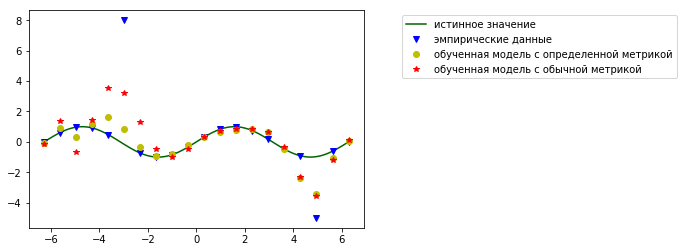

In [423]:
Model(m=10, k=20)

----------------------
Модель с заданой метрикой
theta_new-theta= 214553412.08215
theta_new-theta= 2362119.189334227
theta_new-theta= 2618537.498521336
theta_new-theta= 1556129.2157674104
theta_new-theta= 439183.1857987986
theta_new-theta= 77050.23501717138
theta_new-theta= 10438.472106441952
theta_new-theta= 1312.4718355462057
theta_new-theta= 160.99134544044423
theta_new-theta= 19.58173133747381
theta_new-theta= 2.37753257431049
theta_new-theta= 0.2882744801392918
theta_new-theta= 0.03485423896494407
theta_new-theta= 0.004325311354335409
theta_new-theta= 0.0005141516780830656
theta_new-theta= 6.116083964210148e-05
theta_new-theta= 5.546046051646552e-06
theta_new-theta= 1.6543516438669723e-06
theta_new-theta= 1.7720554975945992e-07
theta_new-theta= 1.7939910171674647e-07
theta_new-theta= 3.3184080480407673e-08
theta_new-theta= 4.936094676390758e-08
theta_new-theta= 7.641195094909052e-08
theta_new-theta= 2.1801369056284687e-08
theta_new-theta= 6.90036194159292e-08
theta_new-theta= 6.77

theta_new-theta= 2.3756132212891847e-09
theta_new-theta= 7.595659717818275e-08
theta_new-theta= 4.813584563462468e-09
theta_new-theta= 6.684368184735924e-10
theta_new-theta= 4.670479021019835e-10
theta_new-theta= 3.909311941450414e-09
theta_new-theta= 4.4373281408250795e-07
theta_new-theta= 1.0254808487450927e-06
theta_new-theta= 4.855281009652857e-07
theta_new-theta= 1.584004935616511e-07
theta_new-theta= 4.447084585242861e-10
theta_new-theta= 1.8350559581489845e-09
theta_new-theta= 1.039882707281525e-09
theta_new-theta= 1.3614095053677159e-08
theta_new-theta= 1.0217293073814505e-08
theta_new-theta= 7.699384710386607e-08
theta_new-theta= 1.1808228500081193e-07
theta_new-theta= 2.3972912399679994e-08
theta_new-theta= 7.48831047739007e-08
theta_new-theta= 1.6676428707763878e-07
theta_new-theta= 5.20123953163823e-07
theta_new-theta= 5.455470349460167e-08
theta_new-theta= 1.4766349223294642e-07
theta_new-theta= 2.597673679335506e-07
theta_new-theta= 2.121014190747286e-08
theta_new-theta= 

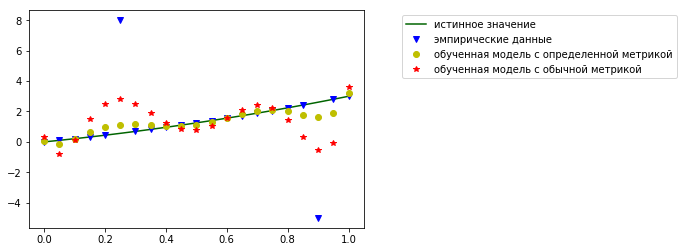

In [432]:
def fun2(x):
    return 2*x+x**2
Model(m=7, fun=fun2, a=0,b=1, k=21)

----------------------
Модель с заданой метрикой
theta_new-theta= 129.65863754089673
theta_new-theta= 74.14673927687338
theta_new-theta= 30.089129513435907
theta_new-theta= 8.442097045338933
theta_new-theta= 2.83259952960303
theta_new-theta= 1.1617900557957197
theta_new-theta= 0.376815006444405
theta_new-theta= 0.11567436744910696
theta_new-theta= 0.026493743068868463
theta_new-theta= 0.004018053523745344
theta_new-theta= 0.0005559029388347447
theta_new-theta= 7.390046490030127e-05
theta_new-theta= 9.666692498153403e-06
theta_new-theta= 1.257604649423741e-06
theta_new-theta= 1.6290040213362766e-07
theta_new-theta= 2.1172934749886612e-08
theta_new-theta= 2.7143341006635785e-09
theta_new-theta= 3.769747175149123e-10
theta_new-theta= 4.7920069919593155e-11
theta_new-theta= 3.0450910205713712e-12
theta_new-theta= 7.920824528809892e-13
theta_new-theta= 1.5390880703808456e-15
theta_new-theta= 2.341852205953773e-14
theta_new-theta= 1.3183260870135254e-13
theta_new-theta= 4.664490049455229e-14

theta_new-theta= 1.1049246277744994e-13
theta_new-theta= 2.1001616344132263e-13
theta_new-theta= 9.231127330767895e-16
theta_new-theta= 8.012234287121811e-15
theta_new-theta= 1.808537122299379e-14
theta_new-theta= 1.6576482119030382e-13
theta_new-theta= 9.100314391345963e-15
theta_new-theta= 5.407651894203104e-15
theta_new-theta= 3.3249244675395625e-15
theta_new-theta= 3.0039179941586334e-13
theta_new-theta= 4.9729588165137445e-14
theta_new-theta= 1.2508556887252137e-13
theta_new-theta= 7.53331833235566e-14
theta_new-theta= 2.8125337713044847e-13
theta_new-theta= 2.601364873359355e-13
theta_new-theta= 2.1237372216879622e-14
theta_new-theta= 1.6518750446452374e-14
theta_new-theta= 1.4513090227426122e-13
theta_new-theta= 3.1165604487588865e-14
theta_new-theta= 2.1285264330110335e-14
theta_new-theta= 3.563292619711818e-14
theta_new-theta= 3.563661131678572e-17
theta_new-theta= 1.7518307065494863e-13
theta_new-theta= 1.0739710850625144e-13
theta_new-theta= 8.102325068233928e-14
theta_new-t

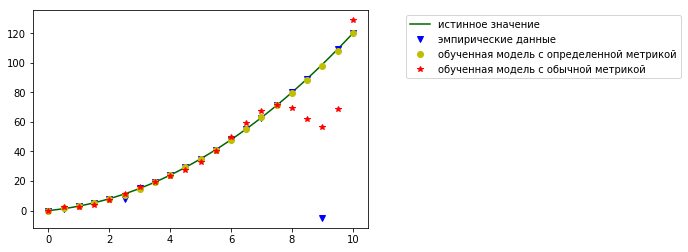

In [433]:
Model(m=7, fun=fun2, a=0,b=10, k=21)

In [426]:
k=11
N=101
a=2
X_train=np.linspace(-a*np.pi, a*np.pi,k)
X=np.linspace(-a*np.pi, a*np.pi,N)
def fun(x):
    return np.sin(x)

Y_train=fun(X_train)+ np.random.randn(len(X_train)) * 0.05

theta_new-theta= 4.4476076815103745e-29
train error= 0.3614586039745555
interation= 1
theta_new-theta= 4.4476076815103745e-29
train error= 0.722917207949111
interation= 1


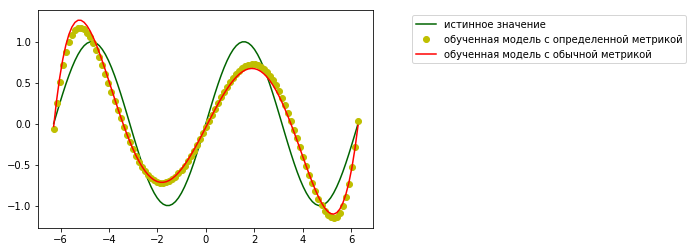

In [427]:
m=6
Coef_metric=Coef(X_train,Y_train,m,metric_q,1e-10)
Coef_quad=Coef(X_train,Y_train,m,quadratic_metric,1e-10)
#print(Coef_q)
#print(Coef)
def model_fun(t):
    s=0
    for i in range(0,m+1):
        s+=Coef_quad[i]*(t**i)
    return  s  #np.sum(np.array([Coef[k]*(t**k) for k in range(0,m+1)]))

def model_fun_m(t):
    s=0
    for i in range(0,m+1):
        s+=Coef_metric[i]*(t**i)
    return  s  #np.sum(np.array([Coef[k]*(t**k) for k in range(0,m+1)]))
    
plt.plot(X,fun(X),'darkgreen',label="истинное значение")
#plt.plot(X_train,Y_train,'bv',label="эмпирические данные")
plt.plot(X,model_fun_q(X),'yo',label="обученная модель с определенной метрикой" )
plt.plot(X,model_fun(X),'r',label="обученная модель с обычной метрикой" )
plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()

In [214]:
N=11
X=np.linspace(0,2,N)
def fun2(x):
    return 2*x
Y=fun2(X)+np.random.randn(len(X)) * 0.05
m=3
Coef=Model(X,Y,m,metric_q,0.0001)

plt.plot(X,Y,'darkgreen',label="истинное значение")
Phi=np.array([X**k for k in range(0,m+1)]).T 

Y_train=Phi@Coef
plt.plot(X,Y_train,'bv',label="эмпирические данные")

diagonal element matrix A/B
[2.41891055e-02 1.91353118e-01 5.00000000e-01 1.75083920e-04
 2.62905246e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 4.32925344e-01 1.61487546e-01]
--------
1 0.0020205789562542723 [-0.03313096  2.33170448 -0.3623866   0.10889726] [-0.04818719  2.36523483 -0.38300995  0.1119515 ]
l= 0.001785625733988224
diagonal element matrix A/B
[0.5        0.5        0.5        0.011485   0.25335852 0.5
 0.5        0.5        0.5        0.5        0.5       ]
--------
2 0.0022158770110918226 [-0.04818719  2.36523483 -0.38300995  0.1119515 ] [-0.03253116  2.32460365 -0.3548121   0.10680944]
l= 0.0027175641343356346
diagonal element matrix A/B
[0.01279541 0.22582048 0.5        0.00717281 0.36580686 0.5
 0.5        0.5        0.5        0.41601989 0.16185466]
--------
3 0.002024136338813288 [-0.03253116  2.32460365 -0.3548121   0.10680944] [-0.04931818  2.37333536 -0.39193303  0.1145472 ]
l= 0.004094420322706121
diagonal element matrix A/B
[0.5        0.

86 0.0022309246081930563 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.00534099353806687
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
87 0.002028515582999798 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.005340993538422085
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971806e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
88 0.00223092460819971 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.005340993538395603
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
89 0.0020285155829998986 [-0.03224094  2.32

 0.5        0.5        0.5        0.40747369 0.16259098]
--------
163 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
164 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
165 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00

--------
221 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
222 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
223 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 

297 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
298 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
299 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.0000000

368 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
369 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
370 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
371 0.002028515582999462 [-0.0322409

439 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
440 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
441 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.0000000

--------
503 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
504 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
505 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 

 0.5        0.5        0.5        0.40747369 0.16259098]
--------
567 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
568 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
569 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00

 0.5        0.5        0.5        0.40747369 0.16259098]
--------
635 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
636 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
637 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00

 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
698 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
699 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
700 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0

770 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
771 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
772 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
773 0.002028515582999462 [-0.0322409

840 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
841 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
842 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
843 0.002028515582999462 [-0.0322409

916 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
917 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
918 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
919 0.002028515582999462 [-0.0322409

 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
982 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
983 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
984 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0

--------
1051 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
1052 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
1053 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-

1132 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
1133 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
1134 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
1135 0.002028515582999462 [-0.032

1214 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
1215 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
1216 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
1217 0.002028515582999462 [-0.032

 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
1262 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
1263 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
1264 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.4074736

1320 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
1321 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
1322 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
1323 0.002028515582999462 [-0.032

--------
1383 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
1384 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
1385 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-

1456 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
1457 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
1458 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
1459 0.002028515582999462 [-0.032

l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
1536 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
1537 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
1538 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.351

1628 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
1629 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
1630 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
1631 0.002028515582999462 [-0.032

 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
1720 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
1721 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
1722 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.4074736

1812 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
1813 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
1814 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
1815 0.002028515582999462 [-0.032

 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
1906 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
1907 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
1908 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.4074736

diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2001 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
2002 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2003 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00

--------
2088 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2089 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
2090 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2091 0.00202851558299946

2178 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2179 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
2180 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2181 0.002028515582999462 [-0.032

 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
2248 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2249 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
2250 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.4074736

 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2321 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
2322 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2323 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5

l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2389 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
2390 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2391 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal

 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
2462 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2463 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
2464 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.4074736

2530 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2531 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
2532 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2533 0.002028515582999462 [-0.032

l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
2596 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2597 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
2598 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.351

 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
2664 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2665 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
2666 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.4074736

2738 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2739 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
2740 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2741 0.002028515582999462 [-0.032

--------
2812 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2813 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
2814 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2815 0.00202851558299946

2898 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2899 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
2900 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2901 0.002028515582999462 [-0.032

2970 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2971 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
2972 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
2973 0.002028515582999462 [-0.032

 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
3044 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3045 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
3046 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.4074736

3108 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3109 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
3110 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3111 0.002028515582999462 [-0.032

 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3187 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
3188 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3189 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5

 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3257 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
3258 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3259 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5

 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
3326 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3327 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
3328 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.4074736

 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3389 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
3390 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3391 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5

3458 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3459 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
3460 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3461 0.002028515582999462 [-0.032

 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
3532 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3533 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
3534 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.4074736

--------
3600 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3601 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
3602 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3603 0.00202851558299946

diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
3674 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3675 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
3676 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0

3741 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
3742 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3743 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.0000

3812 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3813 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
3814 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3815 0.002028515582999462 [-0.032

3886 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3887 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
3888 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3889 0.002028515582999462 [-0.032

--------
3956 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3957 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
3958 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
3959 0.00202851558299946

[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
4031 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
4032 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
4033 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.

 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
4100 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
4101 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
4102 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.4074736

4188 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
4189 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
4190 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
4191 0.002028515582999462 [-0.032

--------
4263 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
4264 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
4265 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-

4333 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
4334 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
4335 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.0000

--------
4401 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
4402 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
4403 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-

 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
4458 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
4459 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
4460 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.4074736

l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
4518 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
4519 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
4520 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.351

--------
4604 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
4605 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
4606 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
4607 0.00202851558299946

 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
4678 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
4679 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
4680 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.4074736

4755 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
4756 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
4757 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.0000

4822 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
4823 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
4824 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
4825 0.002028515582999462 [-0.032

4894 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
4895 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
4896 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
4897 0.002028515582999462 [-0.032

diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
4972 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
4973 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
4974 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0

 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
5040 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
5041 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
5042 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.4074736

 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
5106 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
5107 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
5108 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.4074736

 0.5        0.5        0.5        0.40747369 0.16259098]
--------
5177 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
5178 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
5179 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5

 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
5240 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
5241 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
5242 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.4074736

l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
5322 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.35100616  0.10575175]
l= 0.0053409935379000635
diagonal element matrix A/B
[0.00857377 0.2445071  0.5        0.01777428 0.42274859 0.5
 0.5        0.5        0.5        0.40747369 0.16259098]
--------
5323 0.002028515582999462 [-0.03224094  2.32107097 -0.35100616  0.10575175] [-0.04949551  2.3759452  -0.39502581  0.11546582]
l= 0.0053409935379000635
diagonal element matrix A/B
[5.00000000e-01 5.00000000e-01 5.00000000e-01 6.36971802e-06
 1.65269714e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01]
--------
5324 0.002230924608192083 [-0.04949551  2.3759452  -0.39502581  0.11546582] [-0.03224094  2.32107097 -0.351

KeyboardInterrupt: 

In [121]:
N=501
X=np.linspace(0,10,N)
def fun2(x):
    return 2*x
Y=fun2(X)+np.random.randn(len(X)) * 0.05
m=3
Model(X,Y,m,metric_q)

[-6.28977729e-03  2.00479563e+00 -1.12567152e-03  7.26016814e-05]
1 0.6346609251598962 [-2.23466887e-02  2.01431545e+00 -2.59190602e-03  1.44052279e-04]
2 0.6311839740379539 [ 4.93387319e-03  1.99777172e+00 -4.00594694e-06  1.76054856e-05]
3 0.6547551606032278 [-4.03634959e-02  2.02580771e+00 -4.43940606e-03  2.34595282e-04]
4 0.6568227883680274 [ 2.89096244e-02  1.98257080e+00  2.36487714e-03 -9.46053995e-05]
5 0.7204103167509561 [-6.61044292e-02  2.04133832e+00 -6.56226684e-03  3.19992094e-04]
6 0.721477797665549 [ 4.30473862e-02  1.97674447e+00  2.20824009e-03 -3.43464702e-05]
7 0.8228539595164701 [-7.04447599e-02  2.03917736e+00 -4.61802178e-03  1.50982794e-04]
8 0.8244874183592577 [ 4.28933532e-02  1.98173609e+00 -9.41099432e-05  1.43308240e-04]
9 0.9175185689731613 [-7.08514599e-02  2.03705842e+00 -3.61788737e-03  8.37529281e-05]
10 0.8754436088750495 [4.43752416e-02 1.98044035e+00 2.32800600e-04 1.06907389e-04]
11 0.9467068757231776 [-7.19886963e-02  2.03931570e+00 -4.36807819e-

array([-7.05799466e-02,  2.05502318e+00, -8.71421926e-03,  4.37579081e-04])